# Programming_for_Data_Analysis

### Project1

### Jarlath Scarry

## Generating a random dataset

To generate a good random dataset we need to have some understanding of the type of data we want to replicate. One good way to do this is to take a sample of real data and do some analysis on it. Investigate the types of distributions the variables most closley match and also the correlation between variables.

To find the distribution that best fitts our variables we can run them through the "Fitter" library. By running the Fitter "best_fit" function we can match our sample data to the distribution that matches it best, from a library of over 100 distribution types.

Next we could use pandas corr() to find the pairwise correlation of all columns in the sample data. THis function will output a dataframe showing the correlation values between each of the variables, from 0 to 1, with 100% correlation being shown as 1. We could and use this as a guide to correlate a new random data set

We could also search for information available from existing data. For example, the average height, weight and BMI of a Male in Ireland asr 1.79 m, 89.2 kg, 28.0 respectivley
https://www.worlddata.info/average-bodyheight.php

We could continue to search for more detailed breakdown of the population. Standard deviations and correlations between these values. 


## Get some sample data

So lets take a data set with some variables of American presidents:
https://www.kaggle.com/datasets/atmcfarland/historical-us-president-physical-data-more?resource=download
Historical_Presidents_Physical_Data

I took the CSV file, passed it into a pandas dataframe and selected the columns of interest.
https://pandas.pydata.org/docs/getting_started/intro_tutorials/03_subset_data.html
I could also select the rows of interest with df.loc, but have left all rows in for now.
A description of the short_df contains some useful information, such as mean values for each column


In [101]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import time
from fitter import Fitter

df = pd.read_csv("Historical_Presidents_Physical_Data.csv") #load "Historical_Presidents_Physical_Data" dataset directly from seaborn
short_df = df[["name","height_cm", "weight_kg","body_mass_index","birth_month","corrected_iq"]] #create a short df with targeted columns only
print()
print(short_df.describe()) #display the new short_df info to check it has been selected correctly
print()
short_df.to_csv("short_df.csv") #save to csv file


        height_cm   weight_kg  body_mass_index  birth_month  corrected_iq
count   45.000000   45.000000        45.000000    45.000000     42.000000
mean   180.155556   84.864444        26.142222     6.666667    146.833333
std      7.029016   16.328519         4.818972     3.643175      8.243006
min    163.000000   55.300000        18.600000     1.000000    130.000000
25%    175.000000   75.700000        23.400000     3.000000    140.250000
50%    182.000000   81.600000        25.000000     7.000000    145.000000
75%    185.000000   90.300000        27.100000    10.000000    151.750000
max    193.000000  154.200000        46.600000    12.000000    175.000000



## Examine this data 

### How are the variables distributed?
A histogram of the heights gives a visual indication of the distribution. Now I can check the individual variables to see if they fit a common distribution. First I checked height with Fitter package. It found that the height variables match the Beta and Normal distributions best.

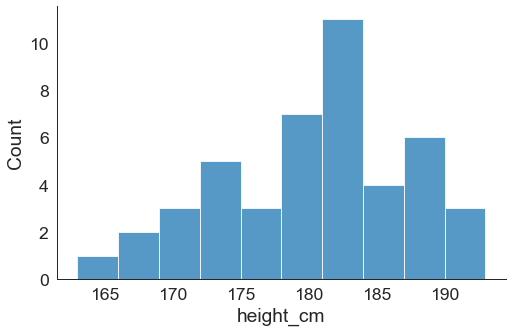

In [102]:
sns.set_style('white') #set the plot style
sns.set_context("paper", font_scale = 2) #set the plot style
sns.displot(data=short_df, x="height_cm", kind="hist", bins = 10, aspect = 1.5,) #plot histogram of heights 

### Beta distribution. What is it?

I found this description and it fits very well with our case! 
"A Beta distribution is a type of probability distribution. This distribution represents a family of probabilities and is a versatile way to represent outcomes for percentages or proportions. For example, how likely is it that Kanye West will win the next Presidential election? You might think the probability is 0.2. Your friend might think it’s 0.15. The beta distribution gives you a way to describe this."
https://www.statisticshowto.com/beta-distribution/

### Normal distribution. What is it?

Normal distribution is a probability distribution that is symmetric about the mean, 
showing that data near the mean are more frequent in occurrence than data far from the mean. 
It is also known as the Gaussian distribution after the German mathematician Carl Friedrich Gauss who first described the phenomen.

In graphical form, the normal distribution appears as a "bell curve".

## Normal distribution examples using Python Numpy

The code below uses Numpy to generate random numbers in a normal distribution
https://www.w3schools.com/python/numpy/numpy_random_normal.asp # Visualization of Normal Distribution


3 parameters in the function. These allow us to control the mean, the standard deviation, and the size of the normal distribution

I ran a random sample of 100 numbers, mean = 0 and standard deviation of 0.1 and plotted the random results. The data appears to be normally distributed but the bell curve is not well defined due to the small sample size. When the sample size is increased to 10000 we can see a well defined bell curve 

C:\Users\JS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


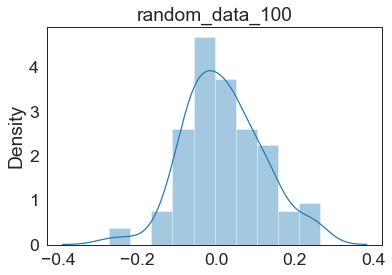

C:\Users\JS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


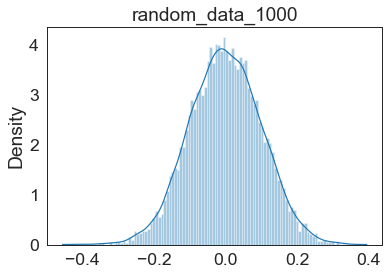

In [103]:
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns

random_data_100 = random.normal(0, 0.1, 100)

random_data_10000 = random.normal(0, 0.1, 10000)
sns.distplot(random_data_100, hist=True, bins=10).set(title='random_data_100')
plt.show()
sns.distplot(random_data_10000, hist=True, bins=100).set(title='random_data_1000')
#print(random_data_sample)
plt.show()

## Find the distribution of our data

To find the distribution that best fitts our variables I ran the height variable through the "Fitter" library. By running the Fitter "best_fit" function I matched the sample data to the distribution that fits it best from a library of over 100 distribution types.

Fitting 5 distributions: 100%|██████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  6.97it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
beta,0.739859,721.025072,-169.631480,inf,0.099356,7.286657e-01
norm,0.742094,740.402486,-177.109087,inf,0.137971,3.278294e-01
gamma,0.742930,743.061976,-173.251706,inf,0.142823,2.892978e-01
burr,0.755464,758.756412,-168.692228,inf,0.178506,1.001716e-01
lognorm,1.373667,953.741889,-145.593056,inf,0.657541,1.323734e-19


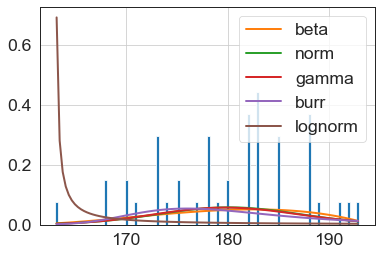

In [84]:
height_cm_fn = short_df["height_cm"].values #create function for sepal length values
f = Fitter(height_cm_fn,distributions =['gamma','lognorm',"beta","burr","norm"]) #check for best fit of data [14]
#[14] (https://medium.com/the-researchers-guide/finding-the-best-distribution-that-fits-your-data-using-pythons-fitter-library-319a5a0972e9) #check for best fit of data 
#f.get_best(method = 'sumsquare_error') #removed this as it takes 30mins to run
f.fit()
f.summary() #print a summmary

## Are the variables corrolated?

### Find the correlation coefficent between 2 variables.
I can calculate the correlation between the height and weight of all the people using the pingouin.corr function.
https://www.codespeedy.com/correlation-calculation-between-variables-in-python/

The table below shows correlation information between the 2 chosen variabled, with r being their Pearson correlation coefficient.

In [104]:
import pingouin

#pingouin.corr(x=df['height_cm'], y=df['weight_kg'])

 
#df = pandas.read_csv('myDataset.csv') 
print('%i people and %x columns' % short_df.shape) 
#df.head()
pingouin.corr(x=df['height_cm'], y=df['weight_kg'])

45 people and 6 columns


,n,r,CI95%,p-val,BF10,power
pearson,45,0.30484,"[0.01, 0.55]",0.041738,1.384,0.53983


## Corrolation between all the variables

I used pandas dataframe.corr() to find the pairwise correlation of all the columns in the short_df. 
This method ignores strings and blank spaces. The output is a dataframe dhowing cor

Next I used the pandas datafeame.corr() to find the pairwise correlation of all columns in the sample data. This function will output a dataframe showing the correlation values between each of the variables, from 0 to 1, with 100% correlation being shown as 1. I can now use this as a guide to correlate a new random data set.

The output heat map shows the corrolation if any between the variables. For example weight corrolates very strongly with bmi with an r value of 0.92 


In [105]:
short_df.head()
pearson_correlation = short_df.corr(method='pearson')
print(pearson_correlation)

                 height_cm  weight_kg  body_mass_index  birth_month  \
height_cm         1.000000   0.304840        -0.093127    -0.174543   
weight_kg         0.304840   1.000000         0.918209     0.146847   
body_mass_index  -0.093127   0.918209         1.000000     0.224515   
birth_month      -0.174543   0.146847         0.224515     1.000000   
corrected_iq     -0.077454  -0.036846        -0.006275     0.072568   

                 corrected_iq  
height_cm           -0.077454  
weight_kg           -0.036846  
body_mass_index     -0.006275  
birth_month          0.072568  
corrected_iq         1.000000  


<AxesSubplot:>

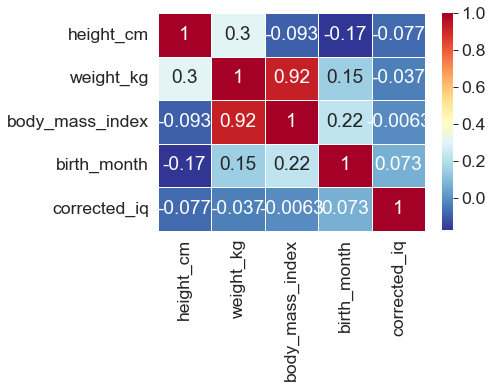

In [86]:

sb.heatmap(pearson_correlation,xticklabels=pearson_correlation.columns,
           yticklabels=pearson_correlation.columns, 
           cmap="RdYlBu_r", annot=True,linewidth=0.5,)
            #select heat map colours and reverse, so red is for hot.

#https://www.codespeedy.com/correlation-calculation-between-variables-in-python/


## Generate random data with constraints

Next step is to generate data with relative constraints based on the correlation matrix. I used scipy.stats.multivariate_normal.rvs(). This draws random samples from the multivariate normal distribution. I used the earlier corrolation matrix for the cov argument.

rvs(mean=None, cov=1, size=1, random_state=None)
https://stackoverflow.com/questions/45952895/generating-correlated-numbers-in-numpy-pandas
https://stackoverflow.com/questions/53123638/python-generating-numbers-according-to-a-corellation-matrix




In [97]:
import numpy as np
from scipy.stats import multivariate_normal as mvn
cov = pearson_correlation
#print(cov)

measurments = mvn.rvs(mean = [180.,84.,26.,6.66,147.], cov=cov, size = 45) #random.normal (loc = 0.0, scale = 1.0, size = None) Arguments

correlated_df = pd.DataFrame(data = measurments, columns = ["height_cm", "weight_kg","body_mass_index", "birth_month","corrected_iq"])
print(correlated_df)

     height_cm  weight_kg  body_mass_index  birth_month  corrected_iq
0   180.081935  83.768968        25.580994     7.751356    146.544445
1   179.157093  84.909856        27.320842     8.093306    147.230994
2   180.249527  85.990874        28.010959     7.075851    146.569333
3   179.196470  85.852403        28.212602     6.852541    147.030775
4   178.692215  84.121662        26.687280     6.780031    147.702359
5   180.465335  83.074053        24.747329     5.964776    147.500820
6   179.263416  82.968994        25.149445     6.050708    145.439311
7   181.226377  84.181571        25.765322     6.497327    147.850406
8   180.583403  83.761030        25.461893     5.571698    148.211434
9   181.121792  84.794534        26.336413     5.859367    145.691060
10  178.723669  84.501483        27.067860     6.559853    146.258147
11  181.440765  84.676776        26.093096     7.327230    149.382125
12  179.519886  83.613818        25.797740     5.098889    145.102791
13  177.602775  82.8

## Add random names

To add names I used the faker to generate a list of American male names. I defined a function generate_names and called it to generate 45 names. I used fake.name_male(), all male since the dataset I am generating is based on past American presidents which are all male.  

https://www.youtube.com/watch?v=jSBjRur5dc8

After generating the names dataferme I combined it with the earlier random data to give a complete dataset.

In [119]:
from faker import Faker
faker = Faker('en_US')

def generate_names():
    return {'name': fake.name_male()}

values = (generate_names() for i in range(45))
names_df = pd.DataFrame(values)
#print(names_df)

frames= [names_df, correlated_df]
new_df = pd.concat([names_df, correlated_df], axis=1, join='inner')
print(new_df)
new_df.to_csv("new_df.csv") #save to csv file

                  name   height_cm  weight_kg  body_mass_index  birth_month  \
0      Shane Gutierrez  180.081935  83.768968        25.580994     7.751356   
1             Troy Lee  179.157093  84.909856        27.320842     8.093306   
2          Barry Munoz  180.249527  85.990874        28.010959     7.075851   
3        David Johnson  179.196470  85.852403        28.212602     6.852541   
4         David Thomas  178.692215  84.121662        26.687280     6.780031   
5       William Rogers  180.465335  83.074053        24.747329     5.964776   
6        David Bridges  179.263416  82.968994        25.149445     6.050708   
7        David Sanchez  181.226377  84.181571        25.765322     6.497327   
8      Jason Stevenson  180.583403  83.761030        25.461893     5.571698   
9       Gregory Ritter  181.121792  84.794534        26.336413     5.859367   
10          David Webb  178.723669  84.501483        27.067860     6.559853   
11       Rodney Powell  181.440765  84.676776       

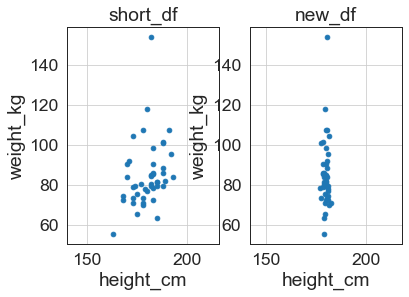

In [118]:
import matplotlib.pyplot as plt
plt.subplot(1,2,1)
plt.scatter(short_df['height_cm'], df['weight_kg'])
plt.xlabel('height_cm')
plt.ylabel('weight_kg')
plt.axis('equal')
plt.grid(True)
plt.title('short_df') 

plt.subplot(1,2,2)
plt.scatter(new_df['height_cm'], df['weight_kg'])
plt.xlabel('height_cm')
plt.ylabel('weight_kg')
plt.axis('equal')
plt.grid(True)
plt.title('new_df') 
plt.show() 


## Conclusion



## References